In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
# Import Normalizer
from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from numpy.linalg import eig
from numpy import array
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

Loading well log data and considering depth >7000ft.

In [85]:
las_old= pd.read_csv('las_file_plot.csv', header=0)
las_old.loc[las_old.NPHI>1, 'NPHI'] =1

las_old.head()

,DEPTH(m),Facies,NPHI,Gamma_max,Gamma_min,PHIF,PORD,RHOFL,RHOMA,Formation_Resistivity,TEMP
0,3666.5916,CLST.SLTY-X-X,0.1475,115,14,0.199843,0.199843,0.8,2.66,0.021643,112.7249
1,3666.7440,CLST.SLTY-X-X,0.3583,115,14,0.218743,0.218743,0.8,2.66,0.021642,112.7285
2,3666.8964,CLST.SLTY-X-X,0.1298,115,14,0.242380,0.242380,0.8,2.66,0.021642,112.7321
3,3667.0488,CLST.SLTY-X-X,0.2489,115,14,0.226408,0.226408,0.8,2.66,0.021641,112.7358
4,3667.2012,CLST.SLTY-X-X,0.2072,115,14,0.216169,0.216169,0.8,2.66,0.021640,112.7394


In [86]:
las_old.columns

Index(['DEPTH(m)', 'Facies', 'NPHI', 'Gamma_max', 'Gamma_min', 'PHIF ',
       'PORD ', 'RHOFL ', 'RHOMA', 'Formation_Resistivity', 'TEMP'],
      dtype='object')

In [87]:
las_old.Facies.unique()

array(['CLST.SLTY-X-X', 'SST-CALC-ARG', 'CLST.SLTY-X-X/F-TIDAL BAR',
       'SST-CALC-ARG/F-TIDAL BAR', 'SST-CALC-ARG/F-UPPER SHOREFACE',
       'SST-CALC-ARG/F-OFFSHORE', 'SST-CALC-ARG/F-TIDAL CHANNEL',
       'SST-CALC-ARG/F-MOUTHBAR', 'SST-KAO-MIC/F-MOUTHBAR',
       'SST-KAO-MIC/F-TIDAL BAR', 'SST-KAO-MIC/F-TIDAL CHANNEL'],
      dtype=object)

In [88]:
d = dict({'CLST.SLTY-X-X': 1, 'SST-CALC-ARG':2, 'CLST.SLTY-X-X/F-TIDAL BAR':3,
       'SST-CALC-ARG/F-TIDAL BAR':4, 'SST-CALC-ARG/F-UPPER SHOREFACE':5,
       'SST-CALC-ARG/F-OFFSHORE':6, 'SST-CALC-ARG/F-TIDAL CHANNEL':7,
       'SST-CALC-ARG/F-MOUTHBAR':8, 'SST-KAO-MIC/F-MOUTHBAR':9,
       'SST-KAO-MIC/F-TIDAL BAR':10, 'SST-KAO-MIC/F-TIDAL CHANNEL':11})

In [89]:
las_old['Facies_new'] = las_old['Facies'].replace(d)
las_old.head()

,DEPTH(m),Facies,NPHI,Gamma_max,Gamma_min,PHIF,PORD,RHOFL,RHOMA,Formation_Resistivity,TEMP,Facies_new
0,3666.5916,CLST.SLTY-X-X,0.1475,115,14,0.199843,0.199843,0.8,2.66,0.021643,112.7249,1
1,3666.7440,CLST.SLTY-X-X,0.3583,115,14,0.218743,0.218743,0.8,2.66,0.021642,112.7285,1
2,3666.8964,CLST.SLTY-X-X,0.1298,115,14,0.242380,0.242380,0.8,2.66,0.021642,112.7321,1
3,3667.0488,CLST.SLTY-X-X,0.2489,115,14,0.226408,0.226408,0.8,2.66,0.021641,112.7358,1
4,3667.2012,CLST.SLTY-X-X,0.2072,115,14,0.216169,0.216169,0.8,2.66,0.021640,112.7394,1


In [101]:
las_old = las_old.rename({'PHIF ':'PHI', 'PORD ': 'PORD', 'DEPTH(m)': 'Depth' }, axis='columns')
las_old

,Depth,Facies,NPHI,Gamma_max,Gamma_min,PHI,PORD,RHOFL,RHOMA,Formation_Resistivity,TEMP,Facies_new
0,3666.5916,CLST.SLTY-X-X,0.1475,115,14,0.199843,0.199843,0.8,2.66,0.021643,112.7249,1
1,3666.7440,CLST.SLTY-X-X,0.3583,115,14,0.218743,0.218743,0.8,2.66,0.021642,112.7285,1
2,3666.8964,CLST.SLTY-X-X,0.1298,115,14,0.242380,0.242380,0.8,2.66,0.021642,112.7321,1
3,3667.0488,CLST.SLTY-X-X,0.2489,115,14,0.226408,0.226408,0.8,2.66,0.021641,112.7358,1
4,3667.2012,CLST.SLTY-X-X,0.2072,115,14,0.216169,0.216169,0.8,2.66,0.021640,112.7394,1
5,3667.3536,CLST.SLTY-X-X,0.2302,115,14,0.178107,0.178107,0.8,2.66,0.021640,112.7430,1
6,3667.5060,CLST.SLTY-X-X,0.3334,115,14,0.197236,0.197236,0.8,2.66,0.021639,112.7467,1
7,3667.6584,CLST.SLTY-X-X,1.0000,115,14,0.218197,0.218197,0.8,2.66,0.021639,112.7503,1
8,3667.8108,CLST.SLTY-X-X,0.2835,115,14,0.243449,0.243449,0.8,2.66,0.021638,112.7539,1
9,3667.9632,CLST.SLTY-X-X,0.1418,115,14,0.259614,0.259614,0.8,2.66,0.021638,112.7575,1


Plot well log dataset

In [102]:
default_color='C0'
def mpwell(tracks, title=None, mindepth=None, maxdepth=None, tagged_depths=None):
    """Create a well log using matplotlib.
       tracks: list of tracks. Each track is a dictionary with a 'traces'
       key (required), and possibly keys that describe the scale (log or linear)
       and appearance of the track. The 'traces' key points to a list of traces.
       Each trace is a dictionary containing a 'data' key that points to a Pandas
       DataFrame that contains the data to be plotted. The DataFrame must have
       a column named 'depth' that contains the depth in the desired units, and 
       also a column named the same as value of the 'curve' key in the trace. The
       trace dictionary may also have a 'label' key that provides the log mnemonic 
       for the trace, and additional keys that describe the appearance of the trace.
       title: Display title for the log.
       mindepth: minimum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       maxdepth: maximum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       tagged_depths: List of depths which should be marked on the logs with a horizontal
       line.
    """
    sns.set(rc={"figure.figsize": (14, 16)})
    sns.set_style("white")
    majorLocator = MultipleLocator(50) #50
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(10) #10
    f, axs = plt.subplots(nrows=1, ncols=len(tracks), figsize=(14, 16))
    #if title:
       # f.suptitle(title, fontsize=22)
    # reserve space at the top and between subplots
    f.subplots_adjust(top=0.99,wspace=0.25)
    first_trace_data = tracks[0]['traces'][0]['data']
    if mindepth is None:
        mindepth = min(first_trace_data['depth'])
    if maxdepth is None:
        maxdepth = max(first_trace_data['depth'])
    # set up each track
    for ax in axs:
        ax.set_ylim(mindepth,maxdepth)
        #ax.invert_yaxis()
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        ax.yaxis.set_minor_locator(minorLocator)
        ax.yaxis.set_major_locator(majorLocator)
        ax.yaxis.grid(b=True, which='major', color='k', linestyle='-')
        ax.yaxis.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.5)
        ax.minorticks_on()
        
    # plot each trace in each track
    for num_track, track in enumerate(tracks):
        for i, trace in enumerate(track['traces']):
            fill = track.get('fill', trace['fill'])
            color = track.get('color', trace['color'])
            label = trace.get('label', trace['curve'])
            ls = trace.get('ls', '-')
            marker = trace.get('marker', 'None')
            axi = axs[num_track].twiny()
            axi.set_ylim(mindepth, maxdepth)
            
            
            axi.set_xlabel(label, color=color, labelpad=5, fontsize=14)

            if (fill == 1):
                class_depth(axi,tagged_depths, label, color)
                axi.minorticks_off()
                axi.grid(False)
            else:
                axi.plot(tracks[num_track]['traces'][0]['data'], tagged_depths, ls=ls, marker=marker, color=color)
               # axi.set_xlim(*trace['range'])
                axi.spines['top'].set_position(('outward', 5+30*i))
                axi.spines['top'].set_color(color)
                axi.xaxis.set_ticks(trace['range'])
                axi.tick_params(axis='x', colors=color, length=0)
                #plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                extent= (trace['range'][1] - trace['range'][0])/5
                extent1= extent/3
                majorLocator1 = MultipleLocator(extent)
                minorLocator1 = MultipleLocator(extent1)
                axi.xaxis.set_major_locator(majorLocator1)
                axi.xaxis.set_minor_locator(minorLocator1)
                axi.xaxis.grid(b=True, which='major', color='k', linestyle='-')
                axi.xaxis.grid(b=True, which='minor', color='r', linestyle='-.', alpha=0.2)
                x_pos=[trace['range'][0],trace['range'][0]+extent, trace['range'][0]+2*extent,\
                       trace['range'][0]+3*extent,trace['range'][0]+4*extent,trace['range'][1]]
                x_pos_label=[trace['range'][0], '','','','', trace['range'][1]]
                axi.set_xticks(x_pos)
                axi.set_xticklabels(x_pos_label, rotation = 0)
                axi.invert_yaxis()
                
                
            if 'xref' in trace:
                axi.axvline(trace['xref'], color='k', linestyle='--')
           
            
            if num_track>0:
                axi.set_yticklabels([])
                #axi.set_yticklabels()
            else:
                # Turn off the "offset" in the y-axis labeling
                y_formatter = mpl.ticker.ScalarFormatter(useOffset=False)
                axi.yaxis.set_major_formatter(y_formatter)
                
        axs[0].set_ylabel('Depth (ft)',fontsize=16)
    return f

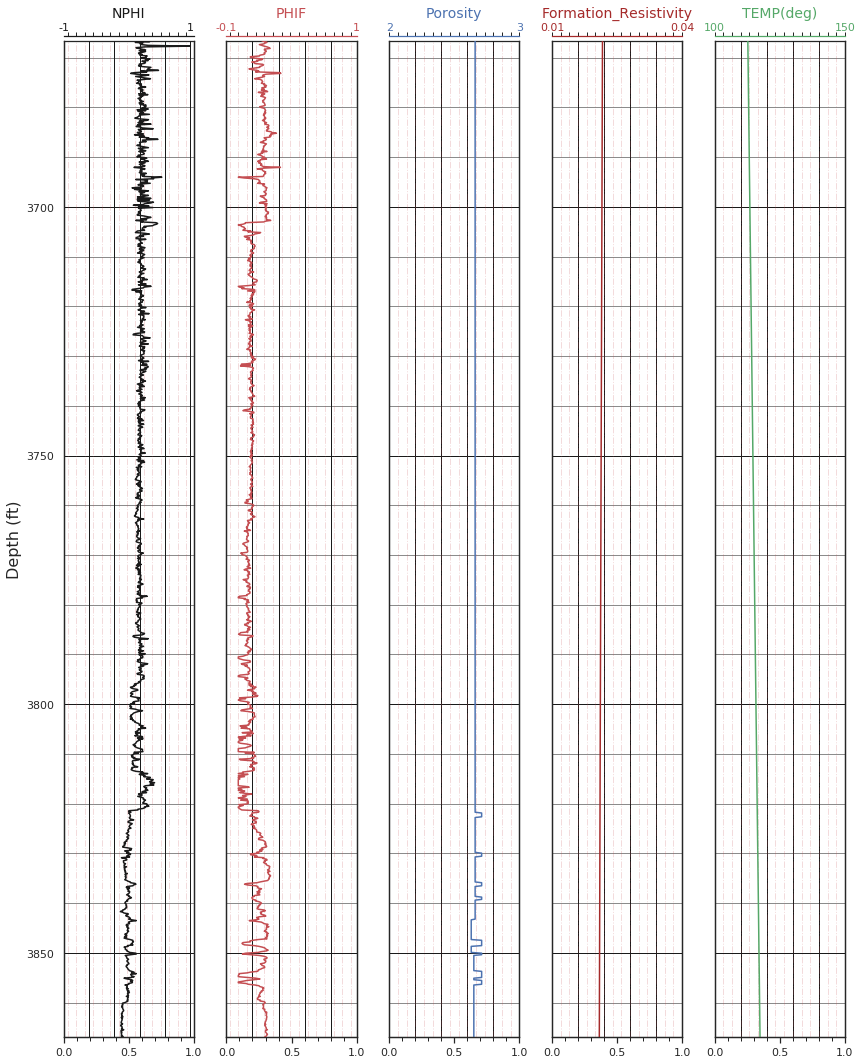

In [103]:
trace11 = {'data': las_old['NPHI'], 'curve': 'NPHI', 'color': 'k', 'fill':0,'range': (-1, 1)}
track1 = {'traces': [trace11]}
trace21 = {'data': las_old['PHI'], 'curve': 'PHIF', 'color': 'r','fill':0,'range': (-0.1, 1)}
track2 = {'traces': [trace21]}
trace31 = {'data': las_old['RHOMA'], 'curve': 'Porosity', 'color': 'b', 'fill':0,'range': (2, 3)}
track3 = {'traces': [trace31]}
trace41 = {'data': las_old['Formation_Resistivity'], 'curve': 'Formation_Resistivity', 'color':'brown' ,'fill':0,'range': (0.01, 0.04)}
track4 = {'traces': [trace41]}
trace51 = {'data': las_old['TEMP'], 'curve': 'TEMP(deg)', 'color':'g','fill':0,'range': (100, 150)}
track5 = {'traces': [trace51]}
tracks = [track1, track2, track3, track4, track5]
xrd_depths = las_old['Depth']
log = mpwell(tracks, 'My well', min(xrd_depths), max(xrd_depths), las_old['Depth'].values ) #

Using cluster 4 and 5 to calculate the labels.

In [122]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies_new'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(14, 12))
    ax[0].plot(logs.NPHI, logs.Depth, '-g')
    ax[1].plot(logs.PHI, logs.Depth, '-')
    ax[2].plot(logs.RHOMA, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.Formation_Resistivity, logs.Depth, '-', color='r')
    ax[4].plot(logs.TEMP, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
      
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[1].set_xlabel("Density")
    ax[1].set_xlim(logs.PHI.min(),logs.PHI.max())
    ax[2].set_xlabel("Density_porosity")
    ax[2].set_xlim(logs.RHOMA.min(),logs.RHOMA.max())
    ax[3].set_xlabel("Poissons_ratio")
    ax[3].set_xlim(logs.Formation_Resistivity.min(),logs.Formation_Resistivity.max())
    ax[4].set_xlabel("Vp")
    ax[4].set_xlim(logs.TEMP.min(),logs.TEMP.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well A', fontsize=14,y=0.94)


In [123]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

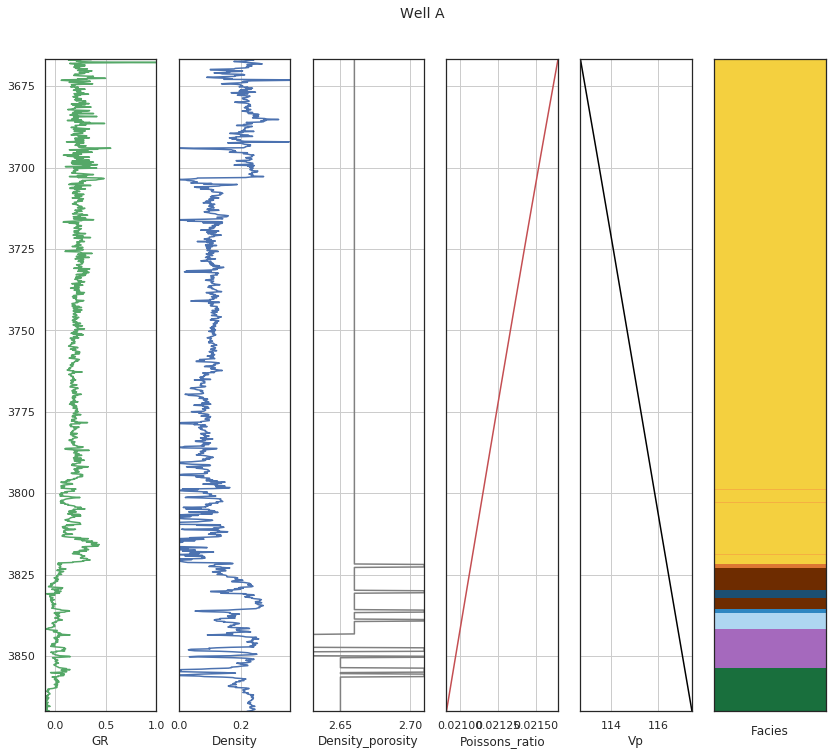

In [124]:
feature_columns =  'Depth NPHI PHI RHOMA Formation_Resistivity TEMP Facies_new'.split()
make_facies_log_plot(las_old[feature_columns], facies_colors)